In [1]:
pip install pandas-plink

Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install pyranges
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
from os.path import join
import pandas as pd
from pandas_plink import read_plink
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import pyranges as pr

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

np.random.seed(42)

## Q1: Exploratory data analysis

In [4]:
(bim, fam, bed) = read_plink('./ADAPTmap_genotypeTOP_20160222_full/ADAPTmap_genotypeTOP_20160222_full')

Mapping files: 100%|██████████| 3/3 [00:00<00:00, 15.56it/s]


In [5]:
#print(bim)
bim_df = pd.DataFrame(bim)
bim_df

,chrom,snp,cm,pos,a0,a1,i
0,0,snp10134-scaffold1361-15149,0.0,0,A,G,0
1,0,snp10135-scaffold1361-44576,0.0,0,A,G,1
2,0,snp10136-scaffold1361-91495,0.0,0,G,A,2
3,0,snp10412-scaffold1372-579082,0.0,0,0,G,3
4,0,snp10413-scaffold1372-610565,0.0,0,G,A,4
...,...,...,...,...,...,...,...
53342,30,snp8813-scaffold1316-69235,0.0,121748953,G,A,53342
53343,30,snp8812-scaffold1316-38259,0.0,121779929,G,A,53343
53344,30,snp32736-scaffold3775-128450,0.0,121824403,G,A,53344
53345,30,snp32735-scaffold3775-77895,0.0,121874958,A,G,53345


In [6]:
#print(fam)
fam_df = pd.DataFrame(fam)
fam_df

,fid,iid,father,mother,gender,trait,i
0,ABR,ET_ABR0001,0,0,0,-9,0
1,ABR,ET_ABR0002,0,0,0,-9,1
2,ABR,ET_ABR0003,0,0,0,-9,2
3,ABR,ET_ABR0004,0,0,0,-9,3
4,ABR,ET_ABR0005,0,0,0,-9,4
...,...,...,...,...,...,...,...
4648,WYG,ET_WYG0042,0,0,0,-9,4648
4649,WYG,ET_WYG0043,0,0,0,-9,4649
4650,WYG,ET_WYG0044,0,0,0,-9,4650
4651,WYG,ET_WYG0045,0,0,0,-9,4651


In [7]:
bed

dask.array<transpose, shape=(53347, 4653), dtype=float32, chunksize=(1024, 1024), chunktype=numpy.ndarray>

In [8]:
#print(bed.compute())
bed_df = pd.DataFrame(bed)
bed_df

,0,1,2,3,4,5,6,7,8,9,...,4643,4644,4645,4646,4647,4648,4649,4650,4651,4652
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,...,2.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53342,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,...,2.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0
53343,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
53344,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0
53345,2.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,...,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,1.0,1.0


### Q1.1 How many subjects/individuals are in this goat dataset?

In [9]:
num_subjects = len(fam)
num_subjects

4653

There are 4653 subjects/individuals in this dataset.

### Q1.2 How many different populations of goats are in this dataset?

In [10]:
num_population = len(fam_df['fid'].unique())
num_population

144

There are 144 populations.

### Q1.3 Create a least two exploratory data analysis plots to help us visualize the data. Describe what you observe about missingness in each of the files, if any.

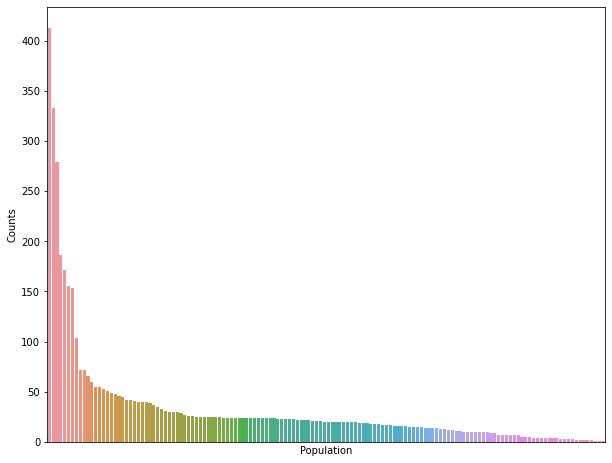

In [11]:
population_size = pd.DataFrame(fam_df['fid'].value_counts())
fig, ax_2 = plt.subplots(figsize=(10,8))
ax_2 = sns.barplot(data=population_size, x=population_size.index, y=population_size.fid)
ax_2.set(xlabel='Population', ylabel='Counts')
plt.xticks([]) 
plt.show()

This barplot shows the population size of each fid.

In [12]:
bim_mod_df = bim_df
snp_1 = []
snp_2 = []
snp_3 = []
for snp in bim_mod_df['snp']:
    snp_split = snp.split('-')
    snp_1.append(snp_split[0])
    snp_2.append(snp_split[1])
    snp_3.append(snp_split[2])
    
bim_mod_df['snp_1'] = snp_1
bim_mod_df['snp_2'] = snp_2
bim_mod_df['snp_3'] = snp_3

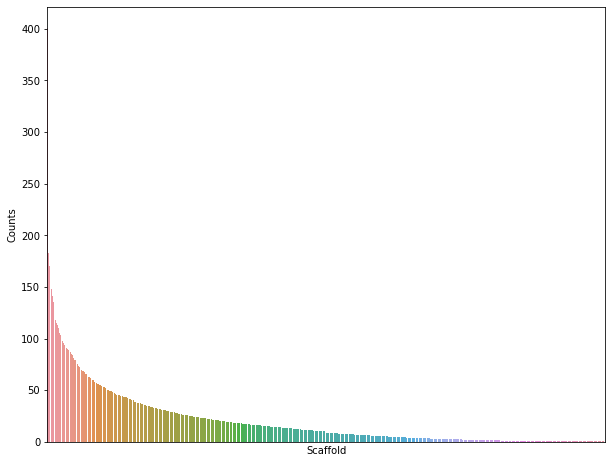

In [13]:
scaffold_count = pd.DataFrame(bim_mod_df['snp_2'].value_counts())
fig, ax_3 = plt.subplots(figsize=(10,8))
ax_3 = sns.barplot(data=scaffold_count, x=scaffold_count.index, y=scaffold_count.snp_2)
ax_3.set(xlabel='Scaffold', ylabel='Counts')
plt.xticks([]) 
plt.show()

This barplot shows the frquencies of each scaffold being analyzed in the dataset.

In [14]:
fam_mod_df = fam_df
zone_id = []
for iid in fam_mod_df['iid']:
    split = iid.split('_')
    zone_id.append(split[0])
    
fam_mod_df['zone_id'] = zone_id
#fam_mod_df

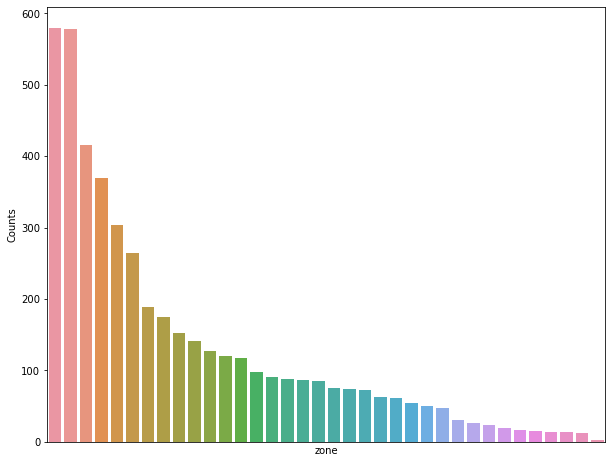

In [15]:
zone_count = pd.DataFrame(fam_mod_df['zone_id'].value_counts())
fig, ax_4 = plt.subplots(figsize=(10,8))
ax_3 = sns.barplot(data=zone_count, x=zone_count.index, y=zone_count.zone_id)
ax_3.set(xlabel='zone', ylabel='Counts')
plt.xticks([]) 
plt.show()

This barplot shows the population size of each zone

### Q1.4: Describe what you observe about missingness in each of the files, if any.

The fam file is missing parents and gender information for most entries.

The bed file is missing some entries (nan in the matrix), which are replaced by 0 later.

The bim file is missing cm column.

## Q2: Genotype missingness

In [16]:
missing_count = []
for individual in bed_df.columns:
    missing_count.append(sum(np.isnan(bed_df[individual])))

#missing_count

In [17]:
missing_count_df = pd.DataFrame(missing_count)
#missing_count_df

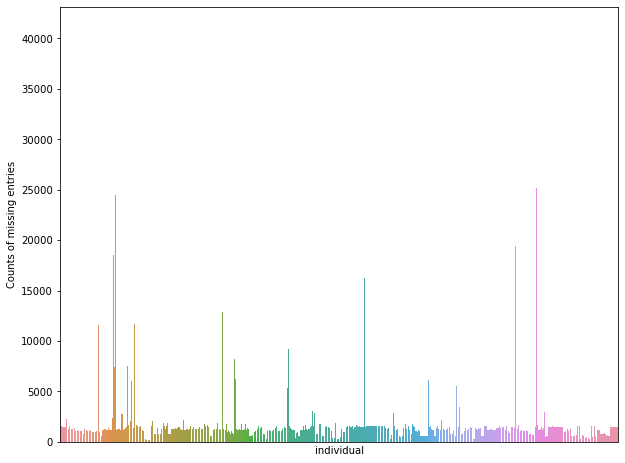

In [18]:
fig, ax_5 = plt.subplots(figsize=(10,8))
ax_3 = sns.barplot(data=missing_count_df, x=missing_count_df.index, y=missing_count_df[0])
ax_3.set(xlabel='individual', ylabel='Counts of missing entries')
plt.xticks([]) 
plt.show()

# Q3: Use PCA to visualize ancestry distribution
Studying worldwide goat population can help us understand molecular diversity across and within continents. PCA is a standard method used for ancestry inference, such as adjusting for population structure and identifying ethnic origins. Failing to account for differences in genetic ancestry may lead to biases in various genetic discoveries. We want to produce a few PCA plots (similar to Figure 4 in the literature) to better understand how we can subset out data for Q4, association analysis.

In [19]:
# %pip install sklearn

In [20]:
no_nan_bed_df = bed_df.fillna(0)
display(no_nan_bed_df)

,0,1,2,3,4,5,6,7,8,9,...,4643,4644,4645,4646,4647,4648,4649,4650,4651,4652
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,...,2.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53342,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,...,2.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0
53343,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
53344,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0
53345,2.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,...,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,1.0,1.0


In [21]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm

In [22]:
print(fam_mod_df["zone_id"])

0       ET
1       ET
2       ET
3       ET
4       ET
        ..
4648    ET
4649    ET
4650    ET
4651    ET
4652    ET
Name: zone_id, Length: 4653, dtype: object


In [23]:
pca = PCA(n_components=36)
pca.fit(no_nan_bed_df)
print(pca.components_[0])
print(pca.components_[1])
print(pca.components_[2])

[-0.01940003 -0.01916147 -0.01944115 ... -0.01942525 -0.01941981
 -0.01964321]
[0.00861265 0.00869172 0.00860273 ... 0.00918997 0.00940591 0.00949896]
[0.01571678 0.01559203 0.01568417 ... 0.01762528 0.01866748 0.01861563]


In [24]:
import matplotlib.patches as mpatches
fam_mod_df["zone_id1"] = pd.factorize(fam_mod_df["zone_id"])[0]

color_map = cm.get_cmap('gist_rainbow', len(fam_mod_df["zone_id"].unique()))
color_palette = [color_map(i) for i in fam_mod_df["zone_id1"].unique()]
colors = [color_palette[i] for i in fam_mod_df["zone_id1"]]

patches = [mpatches.Patch(color=c, label='The red data') for c in color_palette]

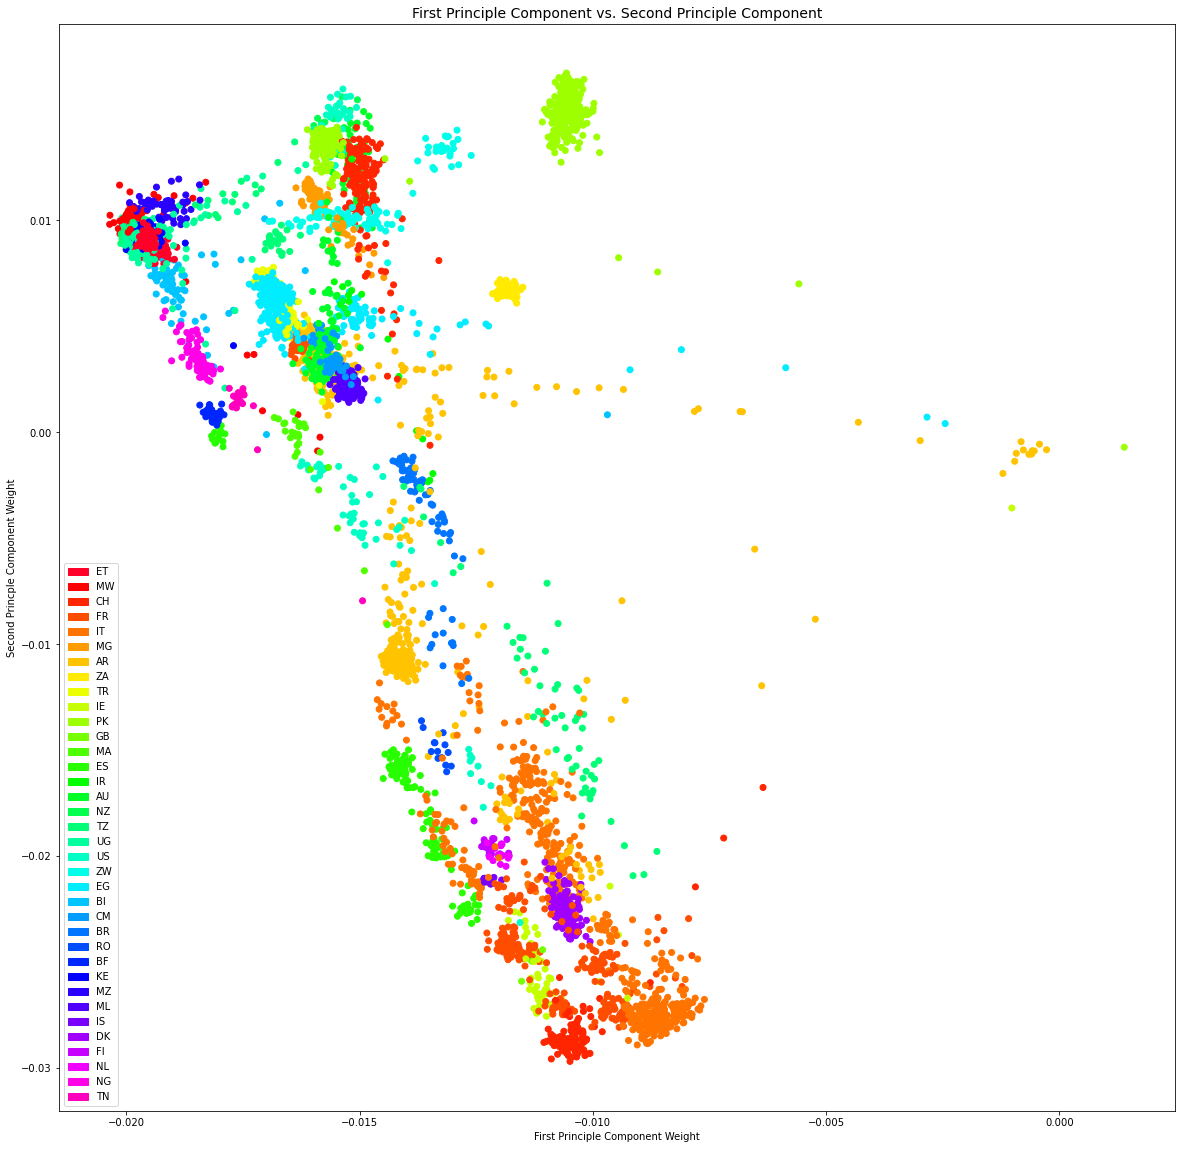

In [25]:
fig, ax = plt.subplots(figsize=(20,20))
plt.title('First Principle Component vs. Second Principle Component', fontsize=14)
plt.xlabel('First Principle Component Weight', fontsize=10)
plt.ylabel('Second Princple Component Weight', fontsize=10)

plt.scatter(pca.components_[0], pca.components_[1], color=colors)

# Plot legend.
ax.legend(patches, fam_mod_df["zone_id"].unique())
plt.show()


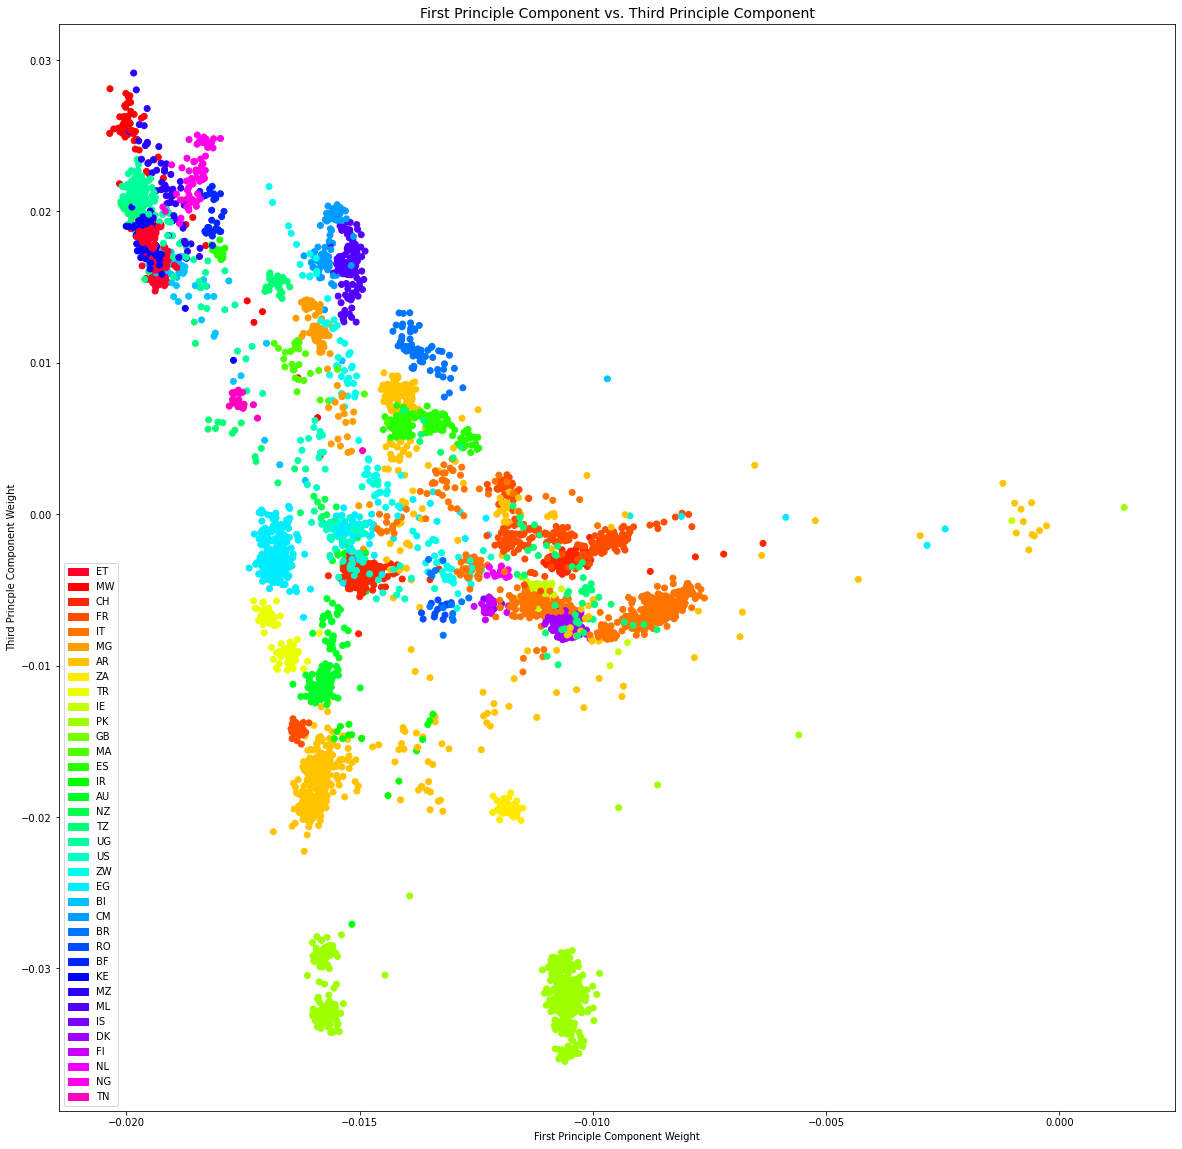

In [26]:
fig, ax = plt.subplots(figsize=(20,20))
plt.title('First Principle Component vs. Third Principle Component', fontsize=14)
plt.xlabel('First Principle Component Weight', fontsize=10)
plt.ylabel('Third Princple Component Weight', fontsize=10)

plt.scatter(pca.components_[0], pca.components_[2], color=colors)

# Plot legend.
ax.legend(patches, fam_mod_df["zone_id"].unique())
plt.show()

Based on the results above, we could also subset our data by country for association analysis.

## Q4: Simulate Phenotypes and run a simple GWAS

### randomly assign trait

In [27]:
fam_df['trait'] = np.random.randint(0, 2, fam_df.shape[0])

In [28]:
# import libraries
from pandas import DataFrame
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt

# sample data
df = DataFrame({'gene' : [i for i in bim_df['snp']],'chromosome' : bim_df['chrom']})
# print(len(bim_df))
#display(df)

In [29]:
#fam_mod_df['zone_id'].value_counts()

### focus on ET subset of data

In [30]:
selected_fam_df = fam_mod_df[fam_mod_df['zone_id'] == 'ET']
selected_bed_df = no_nan_bed_df.T
selected_bed_df = selected_bed_df.iloc[selected_fam_df.index, :]
#displaynt(selected_bed_df)
# selected_bed_df

In [31]:
from tkinter import Y
import statsmodels.api as sm

In [32]:
# from tkinter import Y
# import statsmodels.api as sm

X = selected_bed_df
y = selected_fam_df['trait']
print(X.shape)
print(y.shape)

# X2 = sm.add_constant(X)
# est = sm.Logit(y, X2)
# est2 = est.fit()
# print(est2.summary())

(189, 53347)
(189,)


In [33]:
import scipy

In [34]:
p_value = [];
for i in X.T.index:
    slope, intercept, r, p, se = scipy.stats.linregress(X[i], y)
    p_value.append(p)
#     print(i)

C:\Users\CocoB\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\CocoB\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
C:\Users\CocoB\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:194: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)


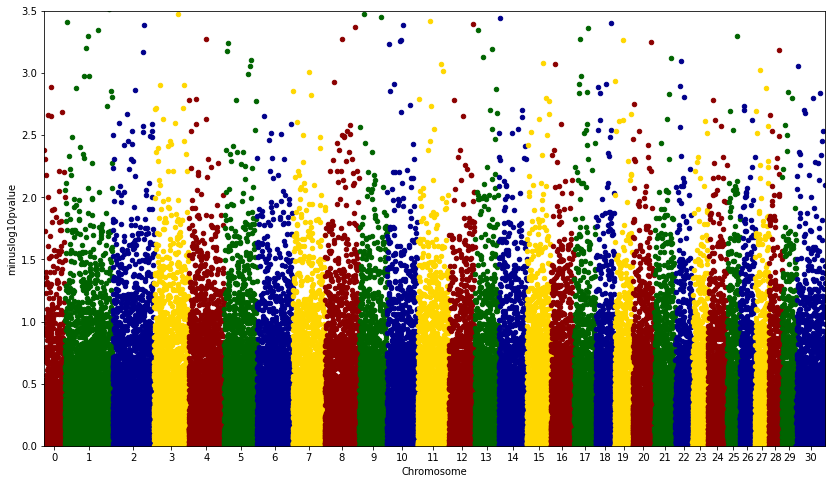

In [35]:
# -log_10(pvalue)
df['minuslog10pvalue'] = -np.log10(p_value)
df_new = df

df_new.chromosome = df_new.chromosome.astype('category')
df_new.chromosome = df_new.chromosome.cat.set_categories(['%i' % i for i in range(31)], ordered=True)

df_new = df_new.sort_values('chromosome')

df_new['ind'] = range(len(df))
df_grouped = df_new.groupby(('chromosome'))

fig = plt.figure(figsize=(14, 8)) 
ax = fig.add_subplot(111)
colors = ['darkred','darkgreen','darkblue', 'gold']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

ax.set_xlim([0, len(df)])
ax.set_ylim([0, 3.5])

ax.set_xlabel('Chromosome')


plt.show()

### All data

In [36]:
y = fam_mod_df['trait']
X = no_nan_bed_df.T
# print(X.shape)
# print(y.shape)

In [37]:
p_value = [];
for i in X.T.index:
    slope, intercept, r, p, se = scipy.stats.linregress(X[i], y)
    p_value.append(p)

C:\Users\CocoB\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\CocoB\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
C:\Users\CocoB\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:194: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)


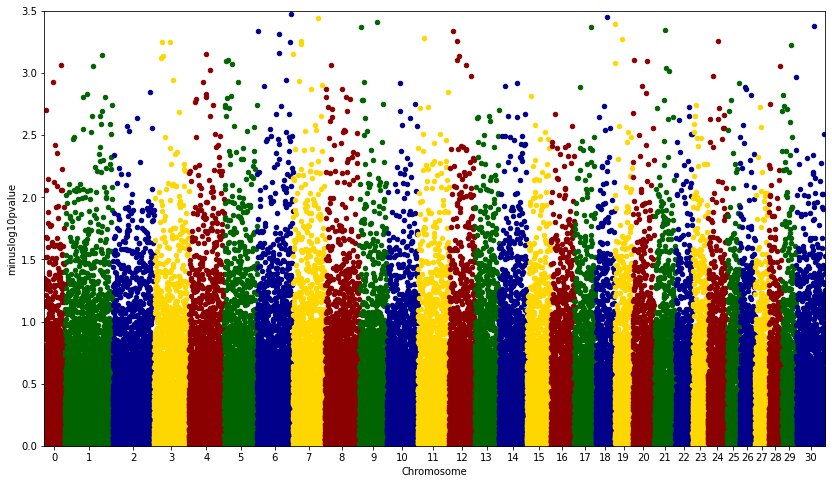

In [38]:
# -log_10(pvalue)
df['minuslog10pvalue'] = -np.log10(p_value)
df_new = df

df_new.chromosome = df_new.chromosome.astype('category')
df_new.chromosome = df_new.chromosome.cat.set_categories(['%i' % i for i in range(31)], ordered=True)

df_new = df_new.sort_values('chromosome')

df_new['ind'] = range(len(df))
df_grouped = df_new.groupby(('chromosome'))

fig = plt.figure(figsize=(14, 8)) 
ax = fig.add_subplot(111)
colors = ['darkred','darkgreen','darkblue', 'gold']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

ax.set_xlim([0, len(df)])
ax.set_ylim([0, 3.5])

ax.set_xlabel('Chromosome')


plt.show()